# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

#the output gives a different number of cities for every new request because we use 'random' function 


Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

      # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date_original = city_weather['dt']
        city_date_formatted = time.localtime(city_date_original) # format for the api call
        city_date = time.strftime('%m-%d-%Y', city_date_formatted) # converting to the US date standard format

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")

        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | homer
Processing Record 2 of Set 1 | bull savanna
Processing Record 3 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 4 of Set 1 | margaret river
Processing Record 5 of Set 1 | villeta
Processing Record 6 of Set 1 | tofol
Processing Record 7 of Set 1 | francistown
Processing Record 8 of Set 1 | marshfield
Processing Record 9 of Set 1 | broken hill
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | georgetown
Processing Record 12 of Set 1 | kavieng
Processing Record 13 of Set 1 | vilyuysk
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | kikwit
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | blackmans bay
Processing Record 18 of Set 1 | alesund
Processing Record 19 of Set 1 | crest
Processing Record 20 of Set 1 | wuhu
Processing Record 21 of Set 1 | san jose village
City not found. Skipping...
Processing Record

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
print(city_data_df.count())

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64


In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,homer,59.6425,-151.5483,16.54,72,75,2.57,US,06-21-2024
1,bull savanna,17.8868,-77.5902,27.58,73,82,7.28,JM,06-21-2024
2,margaret river,-33.9500,115.0667,13.76,59,99,9.31,AU,06-21-2024
3,villeta,5.0089,-74.4723,28.34,99,100,0.65,CO,06-21-2024
4,tofol,5.3248,163.0078,28.07,75,84,3.79,FM,06-21-2024


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("Output_PY/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("Output_PY/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,homer,59.6425,-151.5483,16.54,72,75,2.57,US,06-21-2024
1,bull savanna,17.8868,-77.5902,27.58,73,82,7.28,JM,06-21-2024
2,margaret river,-33.9500,115.0667,13.76,59,99,9.31,AU,06-21-2024
3,villeta,5.0089,-74.4723,28.34,99,100,0.65,CO,06-21-2024
4,tofol,5.3248,163.0078,28.07,75,84,3.79,FM,06-21-2024


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

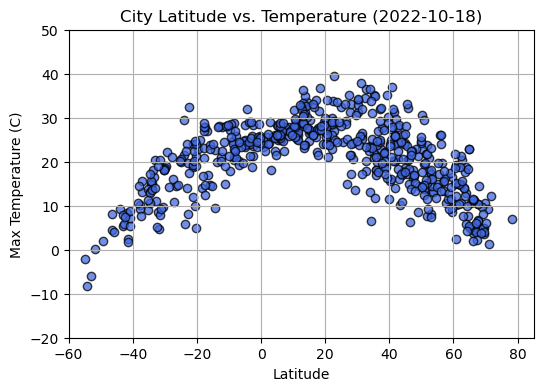

In [10]:
# Build scatter plot for latitude vs. temperature
#Set figure details
plt.figure(figsize=(6, 4))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', edgecolor='black', facecolor='royalblue', alpha=0.75)

# Set the x-axis limits to show the latitude range from -60 to 85 to mirrow the output on the assignment
#sine we are using the random function, my output does not match 100% the output on the assignment as my random selection is different
plt.xlim(-60, 85)
# Set the y-axis limits to range from -20 to 55 to better match the output on the assignment and avoid cutting some data points
plt.ylim(-20, 50)

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("Output_PY/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

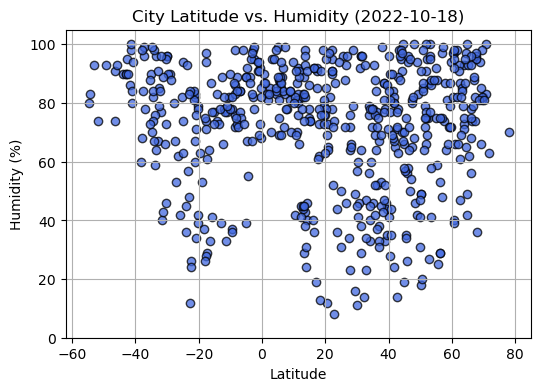

In [11]:
# Build the scatter plots for latitude vs. humidity
#Set figure details
plt.figure(figsize=(6, 4))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', edgecolor='black', facecolor='royalblue', alpha=0.75)

# Set the x-axis limits to show the latitude range from -62 to 85 to mirrow the output on the assignment
#sine we are using the random function, my output does not match 100% the output on the assignment as my random selection is different
plt.xlim(-62, 85)
# Set the y-axis limits to range from -0 to 105 to better match the output of the assignment to the expected displayed results
plt.ylim(0, 105)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure in the  folder 'Output_PY"
plt.savefig("Output_PY/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

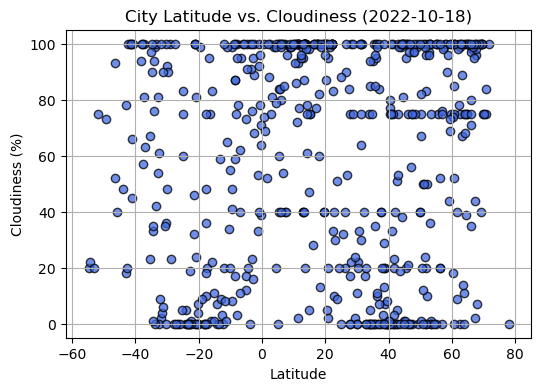

In [12]:
# Build the scatter plots for latitude vs. cloudiness
#Set figure details
plt.figure(figsize=(6, 4))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', edgecolor='black', facecolor='royalblue', alpha=0.75)

# Set the x-axis and y limits to the reange similar to the one displayed on the expected assignments results
#sine we are using the random function, my output does not match 100% the output on the assignment as my random selection is different
plt.xlim(-62, 85)
plt.ylim(-5, 105)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("Output_PY/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

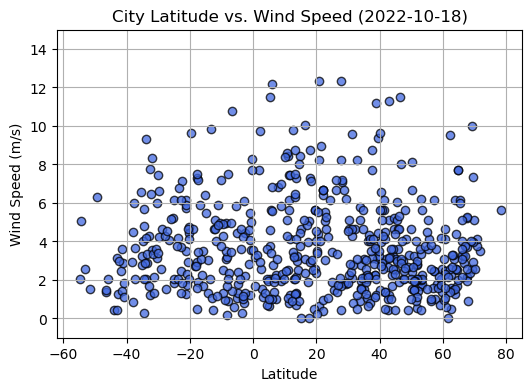

In [13]:
# Build the scatter plots for latitude vs. wind speed
#Set figure details
plt.figure(figsize=(6, 4))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', edgecolor='black', facecolor='royalblue', alpha=0.75)

# Set the x-axis and y limits to the reange similar to the one displayed on the expected assignments results
#sine we are using the random function, my output does not match 100% the output on the assignment as my random selection is different
plt.xlim(-62, 85)
plt.ylim(-1, 15)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("Output_PY/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


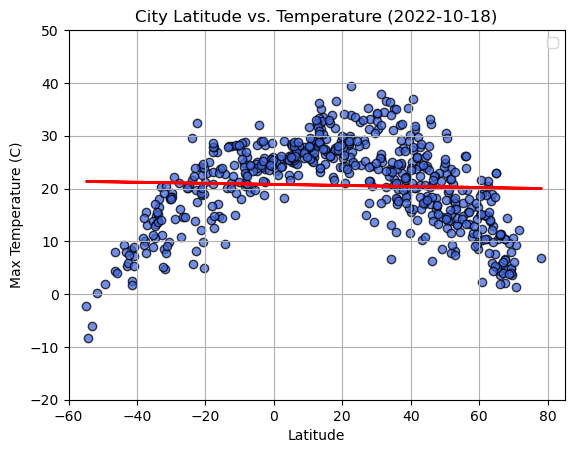

In [30]:
# Define a function to create Linear Regression plots
# The task did not specify which exact plots are needed, so I created 2, please see below:
#City Latitude vs Max Temperature with rrgeression line (all randomly selected cities)

#Dependencies
from sklearn.linear_model import LinearRegression

# Function to plot scatter plot with regression line
def plot_regression_line(x, y, slope, intercept):
    #Set other plot details to match the desired output
    plt.scatter(x, y, color='royalblue', edgecolor='black', alpha=0.75)
    plt.plot(x, slope * x + intercept, color='red', linewidth=2)
    plt.xlabel('Latitude')
    plt.ylabel('Max Temperature (C)')
    plt.title('City Latitude vs. Temperature (2022-10-18)')
    plt.xlim(-60, 85)
    plt.ylim(-20, 50)
    plt.grid(True)
    plt.legend()
    
# Prepare the data for regression, Reshape is used for sklearn
X = city_data_df['Lat'].values.reshape(-1, 1)  
y = city_data_df['Max Temp'].values

# Create and fit the regression model
regression_model = LinearRegression()
regression_model.fit(X, y)

# Extract slope and intercept
slope = regression_model.coef_[0]
intercept = regression_model.intercept_

# Use the plot_regression_line function
plot_regression_line(city_data_df['Lat'].values, city_data_df['Max Temp'].values, slope, intercept)

#Display plot
plt.show()

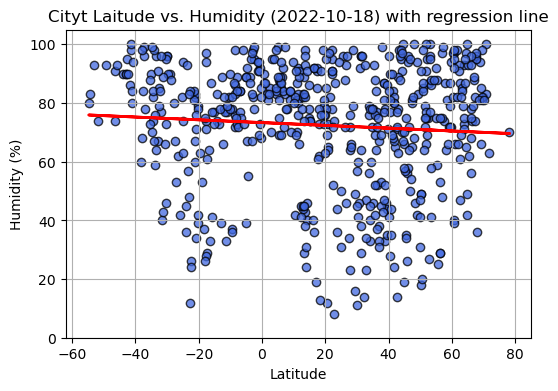

In [15]:
# Function to create a regression line (#City Latitude vs Humidity with rrgeression line (all randomly selected cities))
def plot_regression_line(x, y, title, xlabel, ylabel, xlim, ylim):

    # Prepare the data for regression
    X = x.reshape(-1, 1) 
    y = y

    # Create and fit the regression model
    regression_model = LinearRegression()
    regression_model.fit(X, y)

    # Predict values for the regression line
    y_pred = regression_model.predict(X)

    # Build the scatter plot for latitude vs. humidity
    plt.figure(figsize=(6, 4))
    plt.scatter(x, y, marker='o', edgecolor='black', facecolor='royalblue', alpha=0.75)

    # Plot the regression line (red color)
    plt.plot(x, y_pred, color='red', linewidth=2)

    # Set up the x,y axis limits
    plt.xlim(xlim)
    plt.ylim(ylim)

    # Set the other graph properties
    plt.title('Cityt Laitude vs. Humidity (2022-10-18) with regression line')
    plt.xlabel('Latitude')
    plt.ylabel('Humidity (%)')
    plt.grid(True)

    # Save the figure 
    plt.savefig("Output_PY/Fig2with regression.png")

    # Show plot
    plt.show()

# Convert columns into NumPy arrays to prepare it for calculations and plotting
lat = city_data_df['Lat'].values
humidity = city_data_df['Humidity'].values

# Trigging the plotting process to display regression line on the scatter plot:
plot_regression_line(lat, humidity, "City Latitude vs. Humidity (2022-10-18)", 
                     "Latitude", "Humidity (%)", (-62, 85), (0, 105))

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,homer,59.6425,-151.5483,16.54,72,75,2.57,US,06-21-2024
1,bull savanna,17.8868,-77.5902,27.58,73,82,7.28,JM,06-21-2024
3,villeta,5.0089,-74.4723,28.34,99,100,0.65,CO,06-21-2024
4,tofol,5.3248,163.0078,28.07,75,84,3.79,FM,06-21-2024
6,marshfield,44.6689,-90.1718,18.00,100,100,4.63,US,06-21-2024


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,margaret river,-33.9500,115.0667,13.76,59,99,9.31,AU,06-21-2024
5,francistown,-21.1700,27.5079,12.09,67,0,3.51,BW,06-21-2024
7,broken hill,-31.9500,141.4333,4.72,77,2,3.58,AU,06-21-2024
10,kavieng,-2.5744,150.7967,28.25,78,89,4.43,PG,06-21-2024
12,adamstown,-25.0660,-130.1015,20.39,74,83,1.85,PN,06-21-2024


###  Temperature vs. Latitude Linear Regression Plot

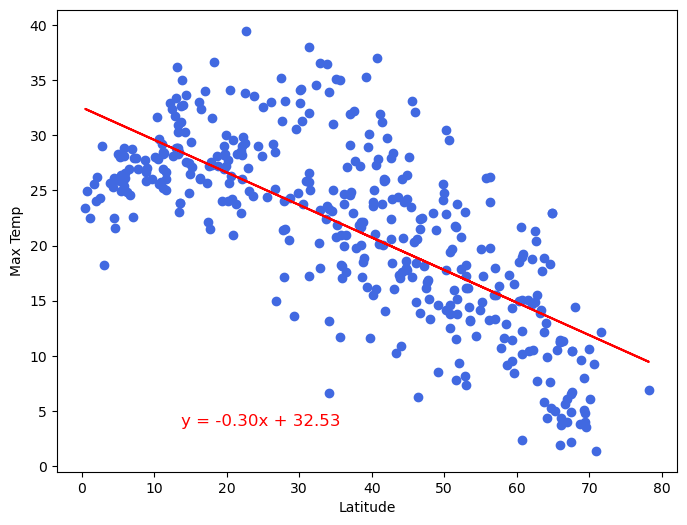

In [18]:
# Linear regression on Northern Hemisphere (Max temp vs Latitude)

# Extract the relevant columns
x = northern_hemi_df[['Lat']].values  
y = northern_hemi_df['Max Temp'].values  

# Create the linear regression model
model = LinearRegression()
model.fit(x, y)

# Predict values
y_pred = model.predict(x)

# Calculate the slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Make the plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='royalblue')
plt.plot(x, y_pred, color='red', linewidth=1.5)

# Display the regression equation in red print on the bottom left part of the plot using annotate
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(equation_text, xy=(0.20, 0.10), xycoords='axes fraction', fontsize=12, color='red')

# Add labels and legend
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Show the plot
plt.show()

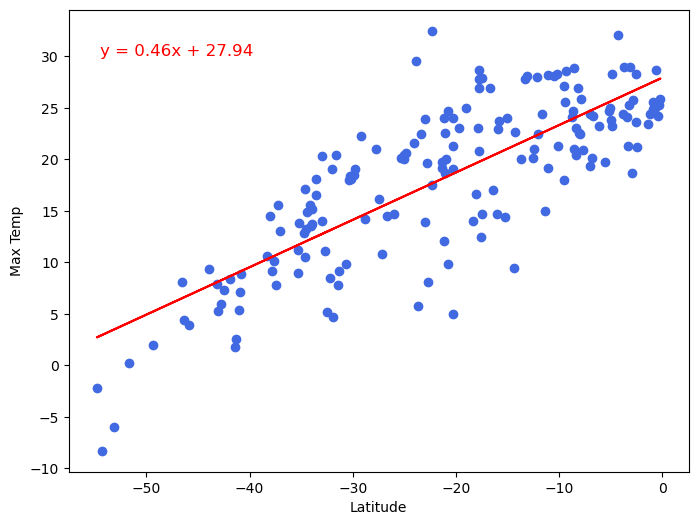

In [19]:
# Linear regression on Southern Hemisphere (Max temp vs Latitude)

# Extract the relevant columns
x = southern_hemi_df[['Lat']].values
y = southern_hemi_df['Max Temp'].values

# Create the linear regression model
model = LinearRegression()
# model fitting
model.fit(x, y)

# Predict values
y_pred = model.predict(x)

# Calculate the slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Make the plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='royalblue')
plt.plot(x, y_pred, color='red', linewidth=1.5)

# Display the regression equation on the top left of the plot in red print
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(equation_text, xy=(0.05, 0.90), xycoords='axes fraction', fontsize=12, color='red')

# Add labels and legend
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Show the plot
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [20]:
# Northern Hemisphere plot shows a slightly lower moderate (slope is -0.33)negative correlation.
# That means the further from the 0 latitude (the more latitude increase), the max temprerature tends to decrease.
# Interception of 33.88 predicts that the maximum temperature at a 0 (zero) latitudie is 33.88C (if other factors are constant).
# However, the scatter plot shows a good deal of variability, particularly at mid-latitudes, indicating that while latitude is a significant factor, other elements also play crucial roles in determining the temperature.


# Southern Hemisphere scatter plot shows moderate (slope is 0.48) positive correalation between latitude and max temperature.
# That means that when latitude grows, the max temperature increases as well.
# Interception of 28.25 suggests that the maximum temperature at a 0 (zero) latitudie will be 28.25 C (if other factors are constant).
# However, the presence of variability also highlights the complexity of other factors (like seasonality) influencing temperature beyond just latitude.



### Humidity vs. Latitude Linear Regression Plot

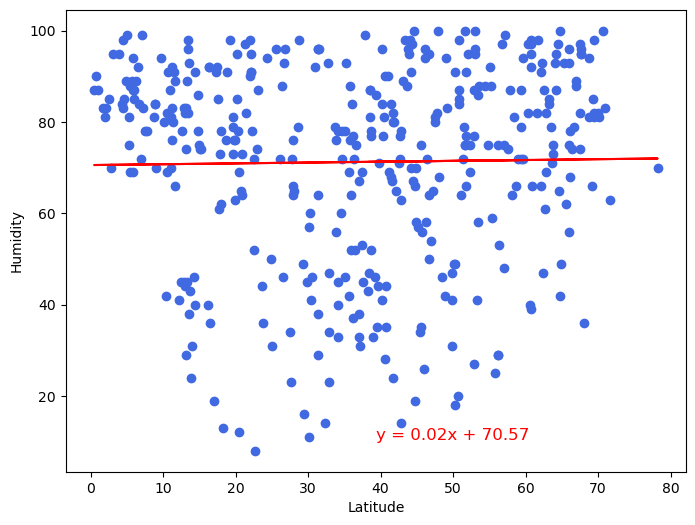

In [21]:
# Northern Hemisphere (Humidity vs Latitude)

# Extract the relevant columns
x = northern_hemi_df[['Lat']].values  
y = northern_hemi_df['Humidity'].values  

# Extract the relevant columns
x = northern_hemi_df[['Lat']].values
y = northern_hemi_df['Humidity'].values

# Create the linear regression model
model = LinearRegression()
model.fit(x, y)

# Predict values
y_pred = model.predict(x)

# Calculate the slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Make the plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='royalblue')
plt.plot(x, y_pred, color='red', linewidth=1.5)

# Display the regression equation in red print on the bottom (central part) of the plot using annotate
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(equation_text, xy=(0.50, 0.07), xycoords='axes fraction', fontsize=12, color='red')

# Add labels and legend
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Show the plot
plt.show()


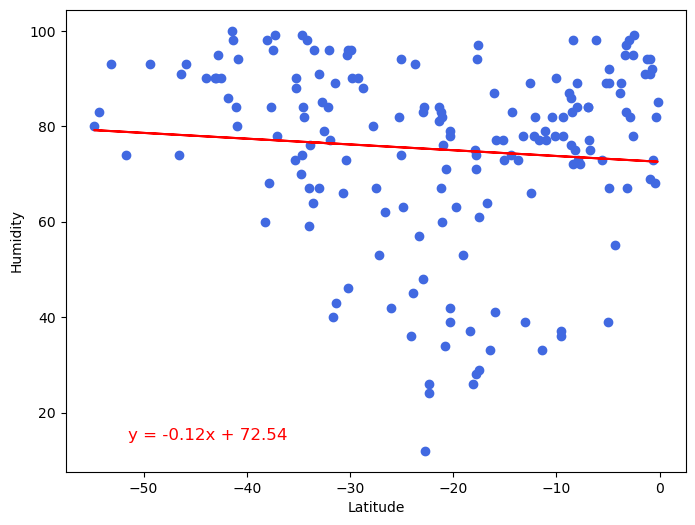

In [22]:
# Southern Hemisphere (Humidity vs Latitude)

# Extract the relevant columns
x = southern_hemi_df[['Lat']].values  
y = southern_hemi_df['Humidity'].values  

# Extract the relevant columns
x = southern_hemi_df[['Lat']].values
y = southern_hemi_df['Humidity'].values

# Create the linear regression model
model = LinearRegression()
model.fit(x, y)

# Predict values
y_pred = model.predict(x)

# Calculate the slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Make the plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='royalblue')
plt.plot(x, y_pred, color='red', linewidth=1.5)

# Display the regression equation in red print on the bottom (left part) of the plot using annotate
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(equation_text, xy=(0.10, 0.07), xycoords='axes fraction', fontsize=12, color='red')

# Add labels and legend
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Show the plot
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [23]:
# Northern Hemisphere scatter plot shows a subtle trend where humidity increases slightly as you move from the equator towards the poles, 
# indicated by the line's slope of 0.10. Despite this, the wide spread of data points suggests humidity levels vary widely at different latitudes. 
# The trend line starts at a humidity level of 66.71 (the intercept), showing a generally higher humidity, but latitude alone isn't a strong predictor of humidity changes.

# Southern Hemisphere scatter plot demonstrates a marginal negative linear relationship between latitude and humidity, characterized by a 
# regression line with a slope of -0.02. This indicates a slight decrease in humidity as latitude approaches the equator. The intercept 
# at 76% at latitude -50 suggests a higher baseline humidity, but the substantial scatter of the data points suggests significant variability 
# influenced by factors other than latitude.


### Cloudiness vs. Latitude Linear Regression Plot

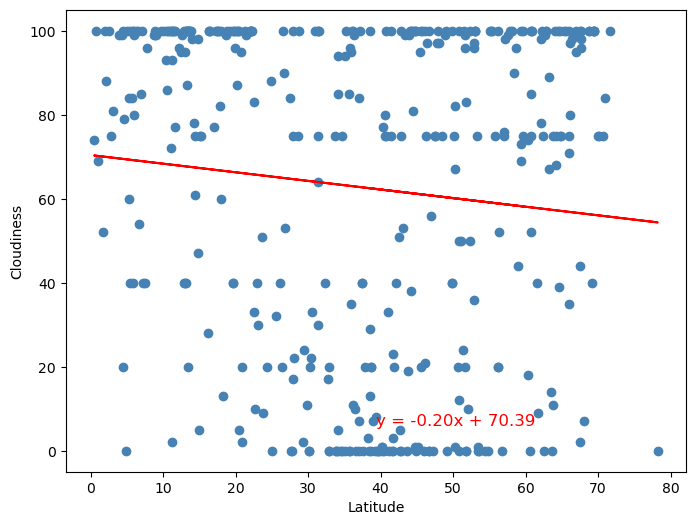

In [24]:
# Northern Hemisphere

# Extract the relevant columns
x = northern_hemi_df[['Lat']].values  
y = northern_hemi_df['Cloudiness'].values  

# Create the linear regression model
model = LinearRegression()
model.fit(x, y)

# Predict values
y_pred = model.predict(x)

# Calculate the slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Make the plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='steelblue')
plt.plot(x, y_pred, color='red', linewidth=1.5)

# Display the regression equation in red print matching the output of the assigment
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(equation_text, xy=(0.50, 0.10), xycoords='axes fraction', fontsize=12, color='red')

# Add labels and legend
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Show the plot
plt.show()

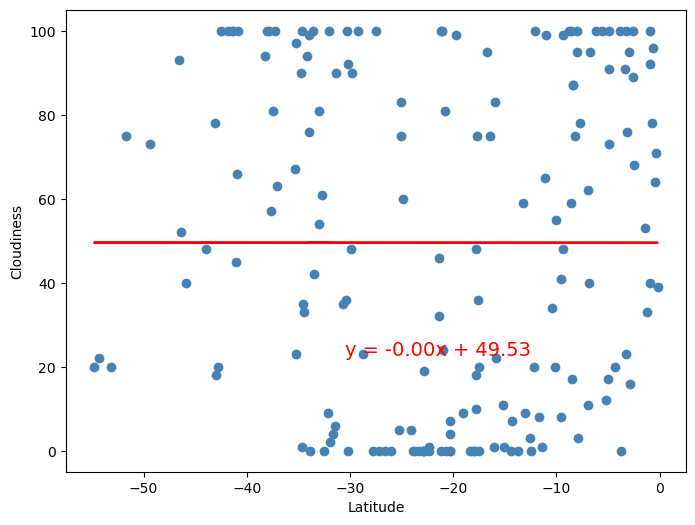

In [25]:
# Southern Hemisphere

# Extract the relevant columns
x = southern_hemi_df[['Lat']].values  
y = southern_hemi_df['Cloudiness'].values  

# Create the linear regression model
model = LinearRegression()
model.fit(x, y)

# Predict values
y_pred = model.predict(x)

# Calculate the slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Make the plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='steelblue')
plt.plot(x, y_pred, color='red', linewidth=1.5)

# Display the regression equation in red print location matching the output of the assigment
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(equation_text, xy=(0.45, 0.25), xycoords='axes fraction', fontsize=14, color='red')

# Add labels and legend
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Show the plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [26]:
# Nothern Hamisphere scatter plot illustrates a slight positive trend in cloudiness as latitude increases from 0 to 80 degrees, 
# with a regression line slope of 0.06. This subtle increase suggests cloudiness marginally rises towards the poles. 
# However, the significant dispersion of data points across all latitudes indicates that other factors heavily influence cloud cover, making latitude a less dominant influencer.

# Southern Hamisphere plot shows a slight negative trend in cloudiness as latitude increases from -50 to 0 degrees, 
# with a slope of -0.31. This indicates that cloudiness decreases as one approaches the equator. The wide spread of 
# the data points suggests that other factors also significantly affect cloudiness across these latitudes.


### Wind Speed vs. Latitude Linear Regression Plot

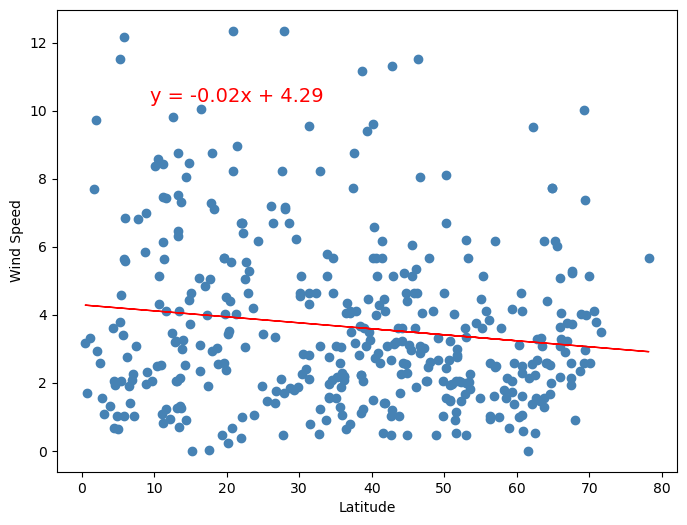

In [27]:
# Northern Hemisphere
# Extract the relevant columns
x = northern_hemi_df[['Lat']].values  
y = northern_hemi_df['Wind Speed'].values  

# Create the linear regression model
model = LinearRegression()
model.fit(x, y)

# Predict values
y_pred = model.predict(x)

# Calculate the slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Make the plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='steelblue')
plt.plot(x, y_pred, color='red', linewidth=1.)

# Display the regression equation in red print, location matching the output of the assigment
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(equation_text, xy=(0.15, 0.80), xycoords='axes fraction', fontsize=14, color='red')

# Add labels and legend
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Show the plot
plt.show()

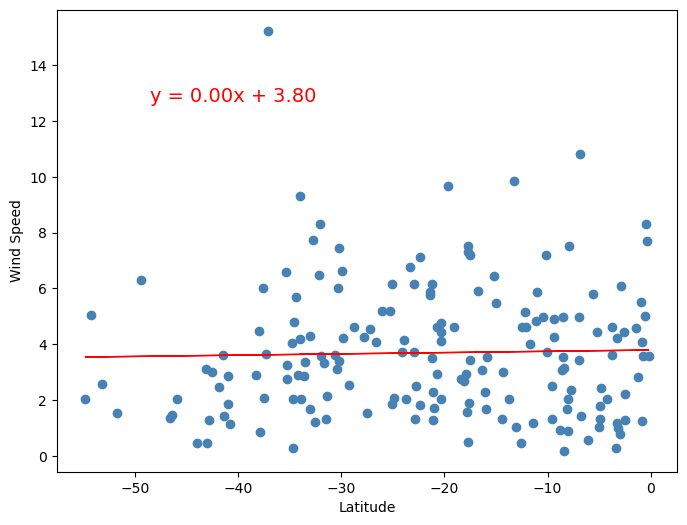

In [28]:
# Southern Hemisphere
# Extract the relevant columns
x = southern_hemi_df[['Lat']].values  
y = southern_hemi_df['Wind Speed'].values  

# Create the linear regression model
model = LinearRegression()
model.fit(x, y)

# Predict values
y_pred = model.predict(x)

# Calculate the slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Make the plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='steelblue')
plt.plot(x, y_pred, color='red', linewidth=1.)

# Display the regression equation in red print, location matching the output of the assigment
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(equation_text, xy=(0.15, 0.80), xycoords='axes fraction', fontsize=14, color='red')

# Add labels and legend
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Show the plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [29]:
# Northern Hemisphere scatter plot reveals a minimal decrease in wind speed with increasing latitude (regression slope is -0.01). 
# There's noticable variability in wind speed across latitudes, indicating that other factors significantly inmpact wind speeds. 
# The intercept at 4.14 suggests an average baseline wind speed near the equator.

# Southern Hemisphere scatter plot shows a slight decrease in wind speed with increasing latitude (slope: -0.01), with considerable 
# variation across latitudes highlighting other significant influences on wind speeds. The intercept at 3.12 indicates an average 
# baseline wind speed near the equator.